In [1]:
    ##############  Initializing  data to create model###########3

In [1]:
# Importing GemPy
import gempy as gp

# Importing aux libraries
import numpy as np
import matplotlib.pyplot as plt


Traceback (most recent call last):
  File "C:\Users\AHMED\anaconda3\lib\site-packages\osgeo\__init__.py", line 29, in swig_import_helper
    return importlib.import_module(mname)
  File "C:\Users\AHMED\anaconda3\lib\importlib\__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1030, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
  File "<frozen importlib._bootstrap>", line 986, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 666, in _load_unlocked
  File "<frozen importlib._bootstrap>", line 565, in module_from_spec
  File "<frozen importlib._bootstrap_external>", line 1173, in create_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
ImportError: DLL load failed while importing _gdal: The specified module could not be found.

On Windows, with Python >= 3.8, DLLs are no longer imported from the 

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\AHMED\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Not subsurface compatibility available


In [2]:
geo_model = gp.create_model('Model1')    ##The first step to create a GemPy model is create a gempy.Model object that will contain all the other data structures and necessary functionality.

In [3]:
geo_model = gp.init_data(geo_model, extent=[0, 791, 0, 200, -582, 0], resolution=[100, 10, 100])

Active grids: ['regular']


In [4]:
gp.set_interpolator(geo_model, theano_optimizer='fast_compile', verbose=[]) ## to help in computing and gathering all data ##

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range              1002.20008
$C_o$            23914.404762
drift equations           [3]


                                                 Creating figure

C:\Users\AHMED\anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


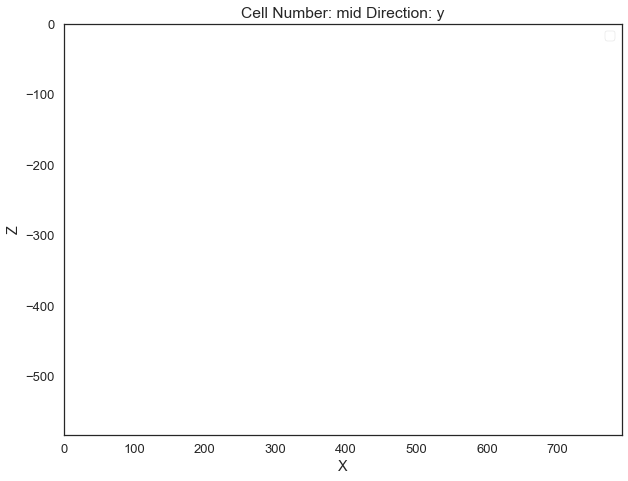

In [5]:
p2d = gp.plot_2d(geo_model)

In [6]:
p3d = gp.plot_3d(geo_model)

                                        ##### Building the model ######
Now that we have everything initialize we can start the construction of the geological model.

In [7]:
geo_model.surfaces   ###Surfaces###

,surface,series,order_surfaces,color,id


In [8]:
geo_model.set_default_surfaces()   ###Default surfaces ####

,surface,series,order_surfaces,color,id
0,surface1,Default series,1,#015482,1
1,surface2,Default series,2,#9f0052,2


C:\Users\AHMED\anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


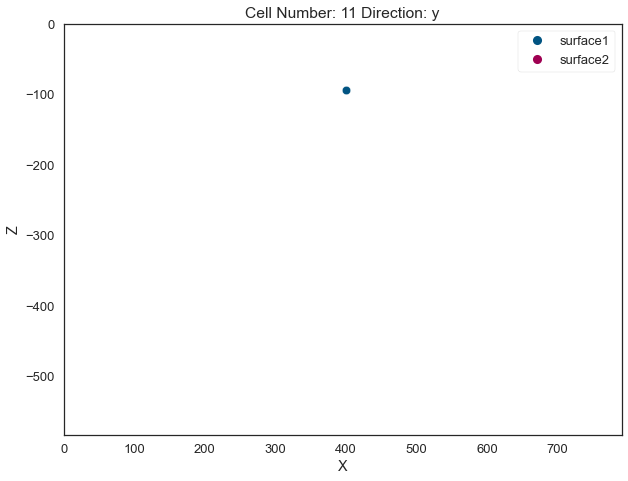

In [9]:
geo_model.add_surface_points(X=223, Y=0.01, Z=-94, surface='surface1')   ### add point##

# Plot in 2D
gp.plot_2d(geo_model, cell_number=11)

In [11]:
geo_model.add_surface_points(X=223, Y=0.01, Z=-94, surface='surface1')   ### add point##

# Plot in 3D
gp.plot_3d(geo_model)

In [12]:
###
                   #### Now we can add the other two points of the layer:

                                    ### Add points ######
####

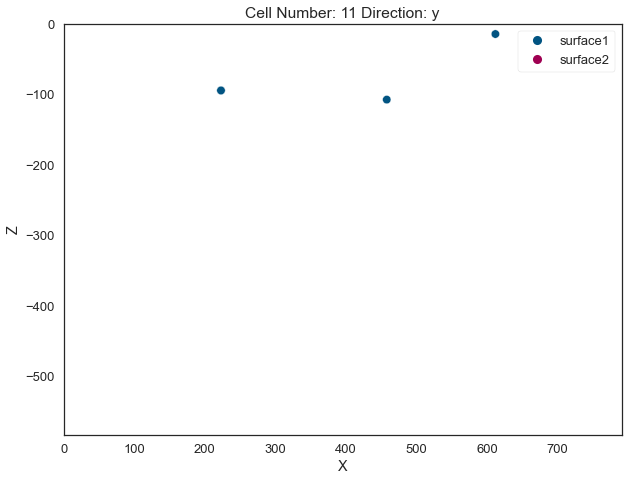

In [13]:
geo_model.add_surface_points(X=458, Y=0, Z=-107, surface='surface1')
geo_model.add_surface_points(X=612, Y=0, Z=-14, surface='surface1')

# Plotting
gp.plot_2d(geo_model, cell_number=11)
gp.plot_3d(geo_model)


In [14]:
#############             Adding orientation    #########

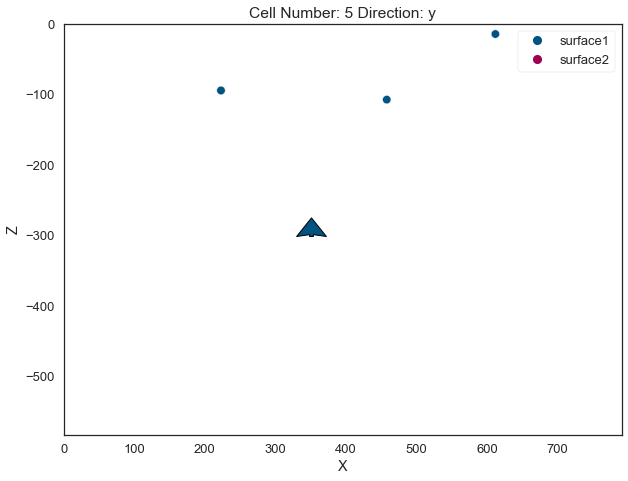

In [15]:
geo_model.add_orientations(X=350, Y=0, Z=-300, surface='surface1', pole_vector=(0, 0, 1))
gp.plot_2d(geo_model, cell_number=5)
gp.plot_3d(geo_model)

In [16]:
gp.compute_model(geo_model)     ###Now we have enough data for finally interpolate!###


Lithology ids 
  [2. 2. 2. ... 2. 2. 2.] 

In [17]:
geo_model.additional_data.kriging_data

,values
range,1002.20008
$C_o$,23914.404762
drift equations,[3]


In [18]:
geo_model.additional_data.rescaling_data

,values
rescaling factor,778.0
centers,"[417.5, 0.005, -157.0]"


In [19]:
#### That is, we have interpolated the 3D surface. We can visualize:  In 2D  ##

C:\Users\AHMED\anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()
C:\Users\AHMED\anaconda3\lib\site-packages\pyvista\plotting\tools.py:571: PyvistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  warnings.warn(


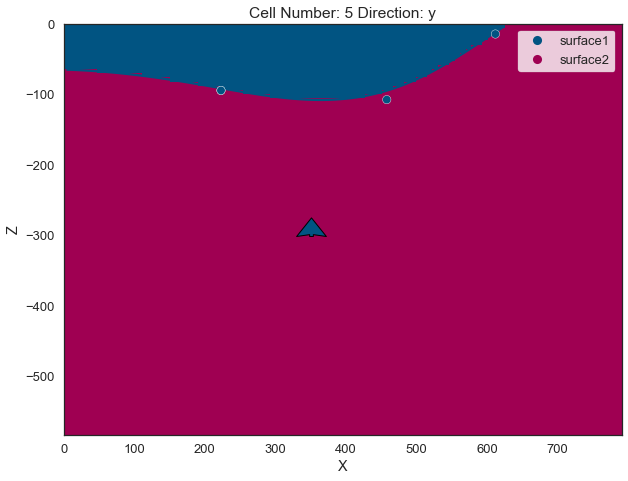

In [20]:
gp.plot_2d(geo_model, cell_number=[5])

# In 3D
gp.plot_3d(geo_model, show_surfaces=True)

In [21]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,surface1,Default series,1,#015482,1
1,surface2,Default series,2,#9f0052,2


In [22]:
geo_model.series

,order_series,BottomRelation,isActive,isFault,isFinite
Default series,1,Erosion,True,False,False


In [23]:
geo_model.add_surfaces(['surface3', 'basement'])

,surface,series,order_surfaces,color,id
0,surface1,Default series,1,#015482,1
1,surface2,Default series,2,#9f0052,2
2,surface3,Default series,3,#ffbe00,3
3,basement,Default series,4,#728f02,4


In [24]:
geo_model.add_surface_points(X=225, Y=0, Z=-269, surface='surface2') ##layer 2 ###
geo_model.add_surface_points(X=459, Y=0, Z=-279, surface='surface2')

,X,Y,Z,smooth,surface
0,223.0,0.01,-94.0,0.000001,surface1
1,223.0,0.01,-94.0,0.000001,surface1
2,458.0,0.00,-107.0,0.000001,surface1
3,612.0,0.00,-14.0,0.000001,surface1
4,225.0,0.00,-269.0,0.000001,surface2
5,459.0,0.00,-279.0,0.000001,surface2


In [25]:
gp.compute_model(geo_model)  ## to compute model ##


Lithology ids 
  [4. 4. 4. ... 2. 2. 2.] 

C:\Users\AHMED\anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()
C:\Users\AHMED\anaconda3\lib\site-packages\pyvista\plotting\tools.py:571: PyvistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  warnings.warn(


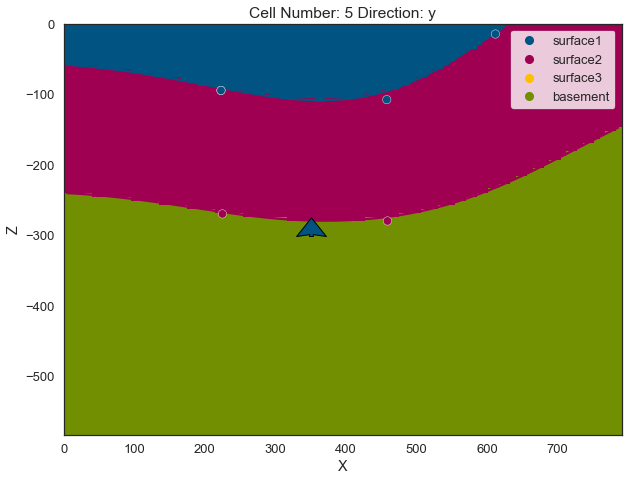

In [26]:
gp.plot_2d(geo_model, cell_number=5, legend='force')
gp.plot_3d(geo_model)

In [27]:
geo_model.add_surface_points(X=225, Y=0, Z=-439, surface='surface3')  ## layer3 ##
geo_model.add_surface_points(X=464, Y=0, Z=-456, surface='surface3')
geo_model.add_surface_points(X=619, Y=0, Z=-433, surface='surface3')

,X,Y,Z,smooth,surface
0,223.0,0.01,-94.0,0.000001,surface1
1,223.0,0.01,-94.0,0.000001,surface1
2,458.0,0.00,-107.0,0.000001,surface1
3,612.0,0.00,-14.0,0.000001,surface1
4,225.0,0.00,-269.0,0.000001,surface2
5,459.0,0.00,-279.0,0.000001,surface2
6,225.0,0.00,-439.0,0.000001,surface3
7,464.0,0.00,-456.0,0.000001,surface3
8,619.0,0.00,-433.0,0.000001,surface3


C:\Users\AHMED\anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()
C:\Users\AHMED\anaconda3\lib\site-packages\pyvista\plotting\tools.py:571: PyvistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  warnings.warn(


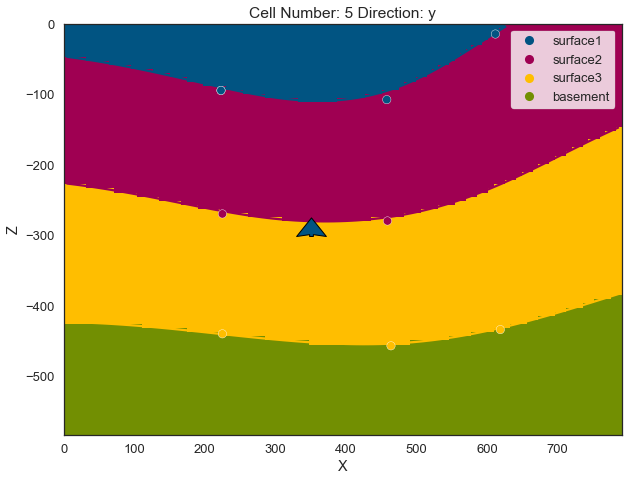

In [28]:
### Computing and plotting 3D   ####
gp.compute_model(geo_model)

gp.plot_2d(geo_model, cell_number=5, legend='force')
gp.plot_3d(geo_model, kwargs_plot_structured_grid={'opacity': .2})

In [29]:
geo_model.add_features('Fault1')   ### add fault ###

,order_series,BottomRelation,isActive,isFault,isFinite
Default series,1,Erosion,True,False,False
Fault1,2,Erosion,False,False,False


In [30]:
geo_model.reorder_features(['Fault1', 'Default series'])

,order_series,BottomRelation,isActive,isFault,isFinite
Fault1,1,Erosion,False,False,False
Default series,2,Erosion,True,False,False


In [31]:
geo_model.set_is_fault('Fault1')

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault1,1,Fault,False,True,False
Default series,2,Erosion,True,False,False


In [32]:
geo_model.add_surfaces('fault1')

,surface,series,order_surfaces,color,id
0,surface1,Default series,1,#015482,1
1,surface2,Default series,2,#9f0052,2
2,surface3,Default series,3,#ffbe00,3
3,basement,Default series,4,#728f02,4
4,fault1,Default series,5,#443988,5


In [33]:
gp.map_stack_to_surfaces(geo_model, {'Fault1': 'fault1'})

,surface,series,order_surfaces,color,id
4,fault1,Fault1,1,#443988,1
0,surface1,Default series,1,#015482,2
1,surface2,Default series,2,#9f0052,3
2,surface3,Default series,3,#ffbe00,4
3,basement,Default series,4,#728f02,5


C:\Users\AHMED\anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


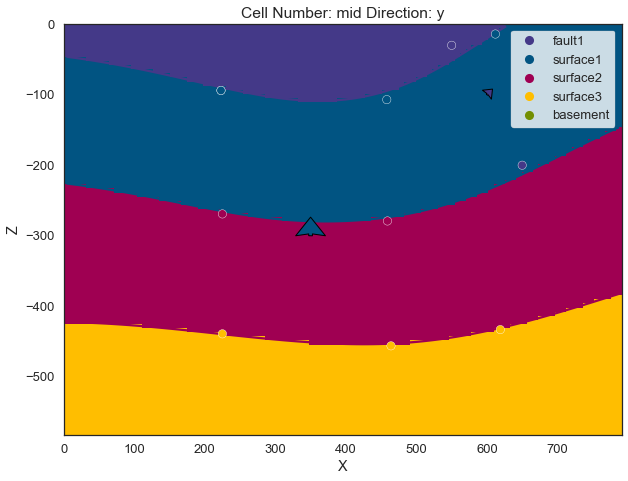

In [34]:
geo_model.add_surface_points(X=550, Y=0, Z=-30, surface='fault1')
geo_model.add_surface_points(X=650, Y=0, Z=-200, surface='fault1')
geo_model.add_orientations(X=600, Y=0, Z=-100, surface='fault1', pole_vector=(.3, 0, .3))

# Plotting Inpute data
gp.plot_2d(geo_model, show_solutions=False)

C:\Users\AHMED\anaconda3\lib\site-packages\pyvista\plotting\tools.py:571: PyvistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  warnings.warn(


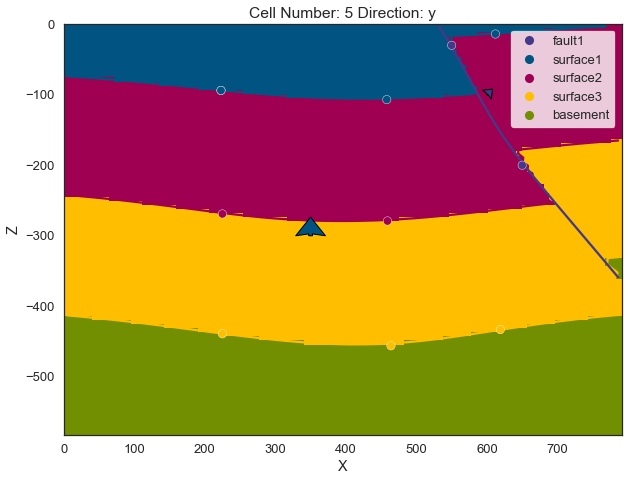

In [35]:
gp.compute_model(geo_model)
gp.plot_2d(geo_model,cell_number=5, legend='force')
gp.plot_3d(geo_model, kwargs_plot_structured_grid={'opacity': .2})

In [36]:
#######  Additional features: #####

In [37]:
geo_model.set_topography(source='random', fd=1.9, d_z=np.array([-150, 0]),
                         resolution=np.array([200, 200]))

Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[   3.955     ,   10.        , -579.09      ],
       [   3.955     ,   10.        , -573.27      ],
       [   3.955     ,   10.        , -567.45      ],
       ...,
       [ 791.        ,  197.98994975, -112.94570349],
       [ 791.        ,  198.99497487, -112.98802574],
       [ 791.        ,  200.        , -112.476378  ]])

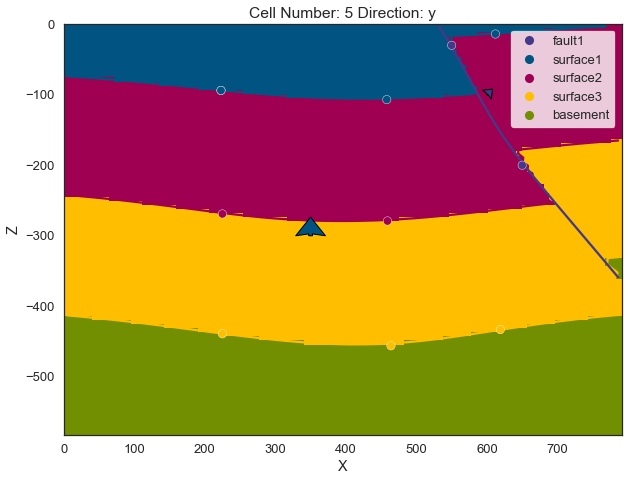

In [38]:
gp.plot_2d(geo_model, cell_number=5, legend='force')
gp.plot_3d(geo_model, kwargs_plot_structured_grid={'opacity':.2})


In [39]:
gp.compute_model(geo_model)

# sphinx_gallery_thumbnail_number = 16
gp.plot_3d(geo_model, show_topography=True)

C:\Users\AHMED\anaconda3\lib\site-packages\gempy\core\solution.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.geological_map = np.array(


In [40]:
geo_model.add_surface_values([0, 2.6, 2.4, 3.2, 3.6], ['density'])

,surface,series,order_surfaces,color,id,density
4,fault1,Fault1,1,#443988,1,0.000000
0,surface1,Default series,1,#015482,2,2.600000
1,surface2,Default series,2,#9f0052,3,2.400000
2,surface3,Default series,3,#ffbe00,4,3.200000
3,basement,Default series,4,#728f02,5,3.600000


# new example   upload data and setup model 3

In [42]:
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'
path_to_data = data_path + "/data/input_data/jan_models/"

geo_data = gp.create_data('combination',
                          extent=[0, 2500, 0, 1000, 0, 1000],
                          resolution=[125, 50, 50],
                          path_o=path_to_data + "model7_orientations.csv",
                          path_i=path_to_data + "model7_surface_points.csv")

Active grids: ['regular']


In [43]:
geo_data.get_data()

X     Y    Z    smooth surface       G_x           G_y  \
surface_points 0     0     0  800  0.000002   rock3       NaN           NaN   
               1     0   500  800  0.000002   rock3       NaN           NaN   
               2     0  1000  800  0.000002   rock3       NaN           NaN   
               3   500     0  800  0.000002   rock3       NaN           NaN   
               4   500   500  800  0.000002   rock3       NaN           NaN   
...                ...   ...  ...       ...     ...       ...           ...   
orientations   4     0  1000  450  0.010000   rock2 -0.422618  9.999741e-13   
               1     0   500  250  0.010000   rock1 -0.422618  9.999741e-13   
               3     0     0  250  0.010000   rock1 -0.422618  9.999741e-13   
               5     0  1000  250  0.010000   rock1 -0.422618  9.999741e-13   
               7  2000   500  400  0.010000   fault  0.819152  1.000050e-12   

                       G_z  
surface_points 0       NaN  
               1       NaN  
               2       NaN  
               3       NaN  
               4       NaN  
...                    ...  
orientations   4  0.906308  
               1  0.906308  
               3  0.906308  
               5  0.906308  
               7  0.573576  

[110 rows x 8 columns]

In [44]:
gp.map_stack_to_surfaces(geo_data, {"Fault_Series": ('fault'), "Strat_Series1": ('rock3'),
                                     "Strat_Series2": ('rock2','rock1'),
                                     "Basement_Series":('basement')})

geo_data.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Fault,True,True,False
Strat_Series1,2,Erosion,True,False,False
Strat_Series2,3,Erosion,True,False,False
Basement_Series,4,Erosion,False,False,False


C:\Users\AHMED\anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


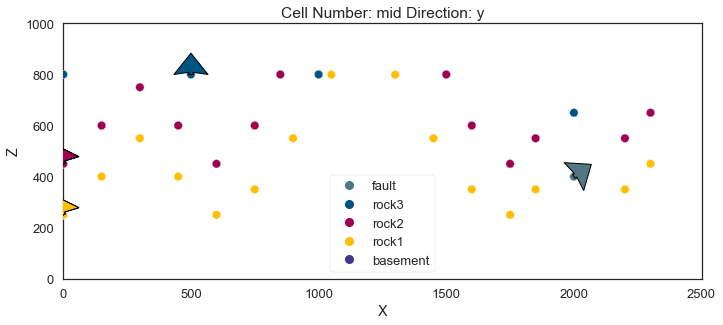

In [45]:
gp.plot_2d(geo_data, direction='y')


In [46]:
interp_data = gp.set_interpolator(geo_data, theano_optimizer='fast_compile')


Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                         values
range              2872.281323
$C_o$            196428.571429
drift equations   [3, 3, 3, 3]


In [47]:
sol = gp.compute_model(geo_data)

C:\Users\AHMED\anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


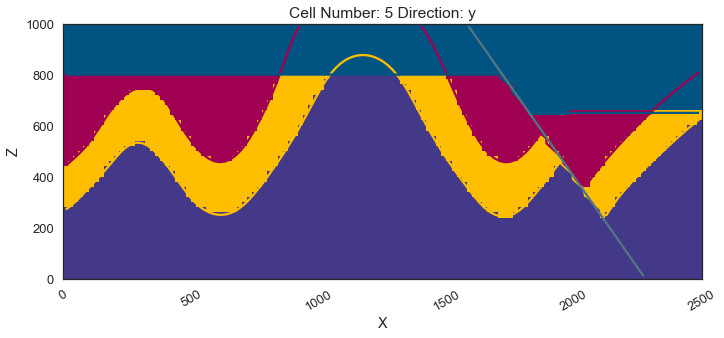

In [48]:
gp.plot_2d(geo_data, cell_number=5,
           direction='y', show_data=False, show_boundaries=True)

In [49]:
gp.plot_3d(geo_data)

C:\Users\AHMED\anaconda3\lib\site-packages\pyvista\plotting\tools.py:571: PyvistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  warnings.warn(
C:\Users\AHMED\anaconda3\lib\site-packages\pyvista\utilities\helpers.py:507: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


# Basics of geological modeling with GemPy  ###########

In [51]:
import gempy as gp

# Importing auxiliary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [52]:
geo_model = gp.create_model('Tutorial_ch1_1_Basics')

In [53]:
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'
# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model, [0, 2000., 0, 2000., 0, 750.], [50, 50, 50],
             path_o=data_path + "/data/input_data/getting_started/"
                                "simple_fault_model_orientations.csv",
             path_i=data_path + "/data/input_data/getting_started/"
                                "simple_fault_model_points.csv",
             default_values=True)

Active grids: ['regular']


Tutorial_ch1_1_Basics  2022-08-30 22:09

In [54]:
geo_model.get_data()

X     Y           Z    smooth      surface       G_x  \
surface_points 0   1000    50  450.000000  0.000002        Shale       NaN   
               1   1000   150  433.333333  0.000002        Shale       NaN   
               2   1000   300  433.333333  0.000002        Shale       NaN   
               3   1000   500  466.666667  0.000002        Shale       NaN   
               4   1000  1000  533.333333  0.000002        Shale       NaN   
               5   1000  1500  433.333333  0.000002        Shale       NaN   
               6   1000  1700  400.000000  0.000002        Shale       NaN   
               7   1000  1950  416.666667  0.000002        Shale       NaN   
               8      0  1000  366.666667  0.000002        Shale       NaN   
               9    300  1000  333.333333  0.000002        Shale       NaN   
               10   450  1000  316.666667  0.000002        Shale       NaN   
               11  1300  1000  500.000000  0.000002        Shale       NaN   
               12  1600  1000  483.333333  0.000002        Shale       NaN   
               13  1900  1000  500.000000  0.000002        Shale       NaN   
               14  1700   500  466.666667  0.000002        Shale       NaN   
               15  1700  1500  450.000000  0.000002        Shale       NaN   
               16  1000    50  350.000000  0.000002  Sandstone_1       NaN   
               17  1000   150  333.333333  0.000002  Sandstone_1       NaN   
               18  1000   300  333.333333  0.000002  Sandstone_1       NaN   
               19  1000   500  366.666667  0.000002  Sandstone_1       NaN   
               20  1000  1000  433.333333  0.000002  Sandstone_1       NaN   
               21  1000  1500  333.333333  0.000002  Sandstone_1       NaN   
               22  1000  1700  300.000000  0.000002  Sandstone_1       NaN   
               23  1000  1950  316.666667  0.000002  Sandstone_1       NaN   
               24     0  1000  266.666667  0.000002  Sandstone_1       NaN   
               25   300  1000  233.333333  0.000002  Sandstone_1       NaN   
               26  1300  1000  400.000000  0.000002  Sandstone_1       NaN   
               27  1600  1000  383.333333  0.000002  Sandstone_1       NaN   
               28  1900  1000  400.000000  0.000002  Sandstone_1       NaN   
               29  1700   500  366.666667  0.000002  Sandstone_1       NaN   
               30  1700  1500  350.000000  0.000002  Sandstone_1       NaN   
               31  1100   150  506.666667  0.000002    Siltstone       NaN   
               32  1100   300  506.666667  0.000002    Siltstone       NaN   
               33  1100  1500  506.666667  0.000002    Siltstone       NaN   
               34  1100  1700  473.333333  0.000002    Siltstone       NaN   
               35  1100  1950  490.000000  0.000002    Siltstone       NaN   
               36     0  1000  433.333333  0.000002    Siltstone       NaN   
               37   300  1000  400.000000  0.000002    Siltstone       NaN   
               38   600  1000  366.666667  0.000002    Siltstone       NaN   
               39  1300  1000  566.666667  0.000002    Siltstone       NaN   
               40  1600  1000  550.000000  0.000002    Siltstone       NaN   
               41  1900  1000  566.666667  0.000002    Siltstone       NaN   
               42  1700   500  533.333333  0.000002    Siltstone       NaN   
               43  1700  1500  516.666667  0.000002    Siltstone       NaN   
               44     0  1000  500.000000  0.000002  Sandstone_2       NaN   
               45   300  1000  466.666667  0.000002  Sandstone_2       NaN   
               46   600  1000  433.333333  0.000002  Sandstone_2       NaN   
               47  1300  1000  633.333333  0.000002  Sandstone_2       NaN   
               48  1600  1000  616.666667  0.000002  Sandstone_2       NaN   
               49  1900  1000  633.333333  0.000002  Sandstone_2       NaN   
               50  1700   500  600.000000  0

In [55]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Shale,Default series,1,#015482,1
1,Sandstone_1,Default series,2,#9f0052,2
2,Siltstone,Default series,3,#ffbe00,3
3,Sandstone_2,Default series,4,#728f02,4
4,Main_Fault,Default series,5,#443988,5
5,basement,Basement,1,#ff3f20,6


In [56]:
gp.map_stack_to_surfaces(geo_model,
                         {"Fault_Series": 'Main_Fault',
                          "Strat_Series": ('Sandstone_2', 'Siltstone',
                                           'Shale', 'Sandstone_1', 'basement')},
                         remove_unused_series=True)

,surface,series,order_surfaces,color,id
4,Main_Fault,Fault_Series,1,#443988,1
0,Shale,Strat_Series,1,#015482,2
1,Sandstone_1,Strat_Series,2,#9f0052,3
2,Siltstone,Strat_Series,3,#ffbe00,4
3,Sandstone_2,Strat_Series,4,#728f02,5
5,basement,Strat_Series,5,#ff3f20,6


In [57]:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Erosion,True,False,False
Strat_Series,2,Erosion,True,False,False


In [58]:
geo_model.set_is_fault(['Fault_Series'])
geo_model.faults.faults_relations_df

Fault colors changed. If you do not like this behavior, set change_color to False.


,Fault_Series,Strat_Series
Fault_Series,False,True
Strat_Series,False,False


In [59]:
geo_model.faults

,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Fault,True,True,False
Strat_Series,2,Erosion,True,False,False


In [60]:
geo_model.faults.faults_relations_df

,Fault_Series,Strat_Series
Fault_Series,False,True
Strat_Series,False,False


In [61]:
geo_model.grid

Grid Object. Values: 
array([[  20. ,   20. ,    7.5],
       [  20. ,   20. ,   22.5],
       [  20. ,   20. ,   37.5],
       ...,
       [1980. , 1980. ,  712.5],
       [1980. , 1980. ,  727.5],
       [1980. , 1980. ,  742.5]])

C:\Users\AHMED\anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


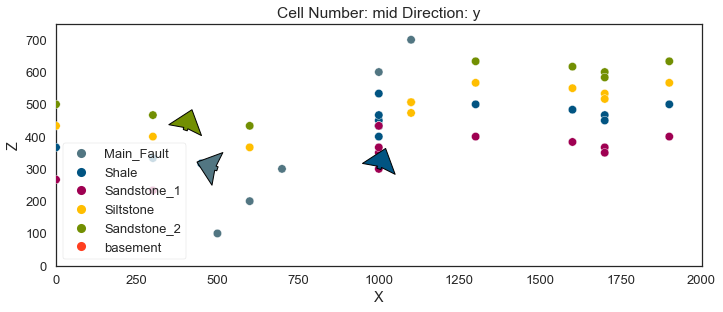

In [62]:
plot = gp.plot_2d(geo_model, show_lith=False, show_boundaries=False)
plt.show()

In [63]:
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')


C:\Users\AHMED\anaconda3\lib\site-packages\pyvista\utilities\helpers.py:507: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


In [64]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                         values
range              2926.174978
$C_o$            203869.047619
drift equations         [3, 3]


In [65]:
gp.get_data(geo_model, 'kriging')

,values
range,2926.174978
$C_o$,203869.047619
drift equations,"[3, 3]"


In [66]:
sol = gp.compute_model(geo_model)

C:\Users\AHMED\anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


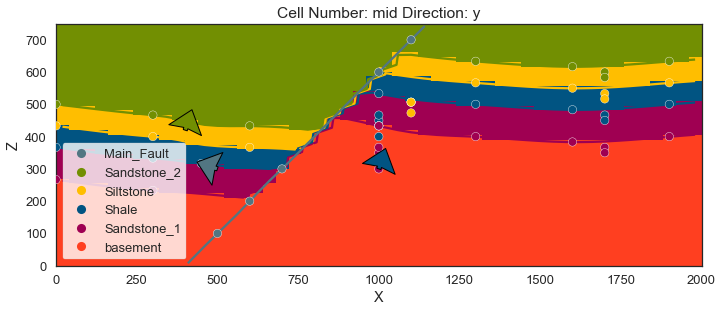

In [67]:
gp.plot_2d(geo_model, show_data=True)
plt.show()

In [ ]:
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

C:\Users\AHMED\anaconda3\lib\site-packages\pyvista\plotting\tools.py:571: PyvistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  warnings.warn(
C:\Users\AHMED\anaconda3\lib\site-packages\pyvista\utilities\helpers.py:507: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


# Analyzing Geomodel Topology  

In [4]:
import gempy as gp
from gempy.assets import topology as tp

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
geo_model = gp.create_model("Model_Tutorial6")
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'
gp.init_data(
    geo_model, [0, 3000, 0, 20, 0, 2000], [50, 10, 67],
    path_i=data_path+"data/input_data/tut_chapter6/ch6_data_interf.csv",
    path_o=data_path+"data/input_data/tut_chapter6/ch6_data_fol.csv"
)

Active grids: ['regular']


Model_Tutorial6  2022-08-31 11:52

In [7]:
geo_model.get_data()

X          Y            Z    smooth  surface  \
surface_points 0   1700.000000   0.000000   640.000000  0.000002    Fault   
               1   1500.000000  10.000000   990.000000  0.000002    Fault   
               2   1300.000000  10.000000  1340.000000  0.000002    Fault   
               3   2500.000000  10.000000   911.000000  0.000002  Layer 2   
               4    500.000000  10.000000  1681.000000  0.000002  Layer 2   
               5   2500.000000  10.000000   704.000000  0.000002  Layer 3   
               6    500.000000  10.000000  1474.000000  0.000002  Layer 3   
               7   2500.000000  10.000000   497.000000  0.000002  Layer 4   
               8    500.000000  10.000000  1267.000000  0.000002  Layer 4   
               9   2500.000000  10.000000   290.000000  0.000002  Layer 5   
               10   500.000000  10.000000  1060.000000  0.000002  Layer 5   
orientations   0   1500.000000   6.666667   990.000000  0.010000    Fault   
               1    506.333333   9.666667  1679.333333  0.010000  Layer 2   
               2   2500.000000   9.666667   911.000000  0.010000  Layer 2   

                        G_x           G_y       G_z  
surface_points 0        NaN           NaN       NaN  
               1        NaN           NaN       NaN  
               2        NaN           NaN       NaN  
               3        NaN           NaN       NaN  
               4        NaN           NaN       NaN  
               5        NaN           NaN       NaN  
               6        NaN           NaN       NaN  
               7        NaN           NaN       NaN  
               8        NaN           NaN       NaN  
               9        NaN           NaN       NaN  
               10       NaN           NaN       NaN  
orientations   0   0.868243 -5.537708e-15  0.496139  
               1   0.258819  1.584810e-17  0.965926  
               2   0.258819  1.584810e-17  0.965926

In [10]:
gp.map_stack_to_surfaces(
    geo_model,
    {
        "fault": "Fault",
        "Rest": ('Layer 2', 'Layer 3', 'Layer 4', 'Layer 5')
    }
)

,surface,series,order_surfaces,color,id
0,Fault,fault,1,#015482,1
1,Layer 2,Rest,1,#9f0052,2
2,Layer 3,Rest,2,#ffbe00,3
3,Layer 4,Rest,3,#728f02,4
4,Layer 5,Rest,4,#443988,5
5,basement,Basement,1,#ff3f20,6


In [11]:
geo_model.set_is_fault(["fault"]);
gp.set_interpolator(geo_model)
sol = gp.compute_model(geo_model, compute_mesh=True)

Fault colors changed. If you do not like this behavior, set change_color to False.
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                         values
range              3605.606745
$C_o$            309533.333333
drift equations      [3, 3, 3]


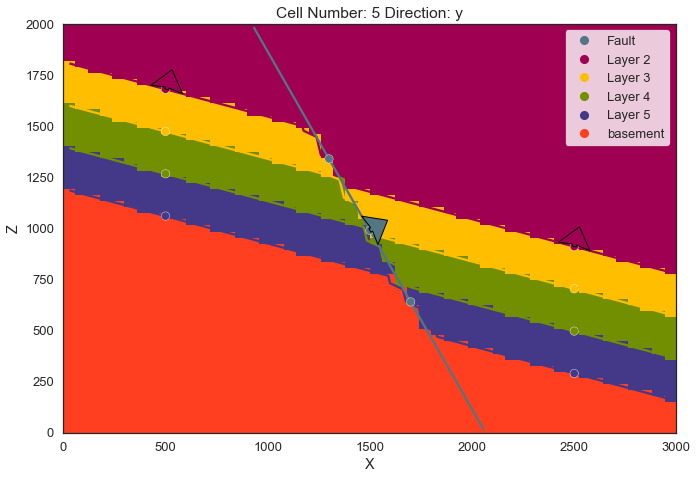

In [17]:
gp.plot_2d(geo_model, cell_number=[5])

Analyzing Topology

In [20]:
edges, centroids = tp.compute_topology(geo_model)

In [21]:
edges

{(1, 2),
 (1, 6),
 (1, 7),
 (1, 8),
 (2, 3),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 9),
 (3, 10),
 (4, 5),
 (4, 10),
 (5, 10),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10)}

In [22]:
centroids

{1: array([35.27893175,  4.5       , 50.19485658]),
 2: array([36.46666667,  4.5       , 29.14444444]),
 3: array([37.59756098,  4.5       , 21.62195122]),
 4: array([38.84563758,  4.5       , 14.00671141]),
 5: array([39.09550562,  4.5       ,  5.37640449]),
 6: array([ 9.79081633,  4.5       , 60.10204082]),
 7: array([10.17687075,  4.5       , 51.02721088]),
 8: array([11.37804878,  4.5       , 43.47560976]),
 9: array([12.51098901,  4.5       , 35.90659341]),
 10: array([13.659857  ,  4.5       , 15.34320735])}

Visualizing topology

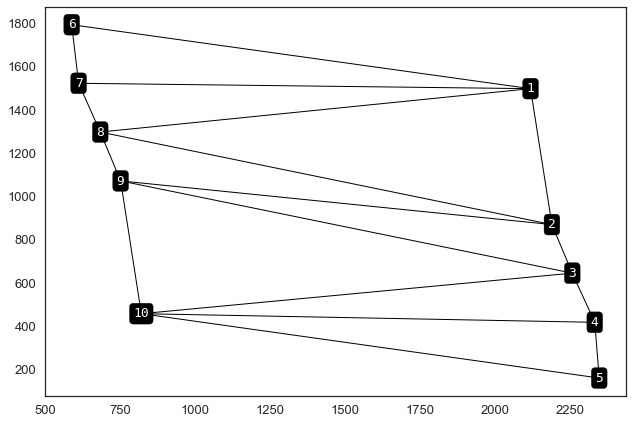

In [23]:
gp.plot.plot_topology(geo_model, edges, centroids)
plt.show()

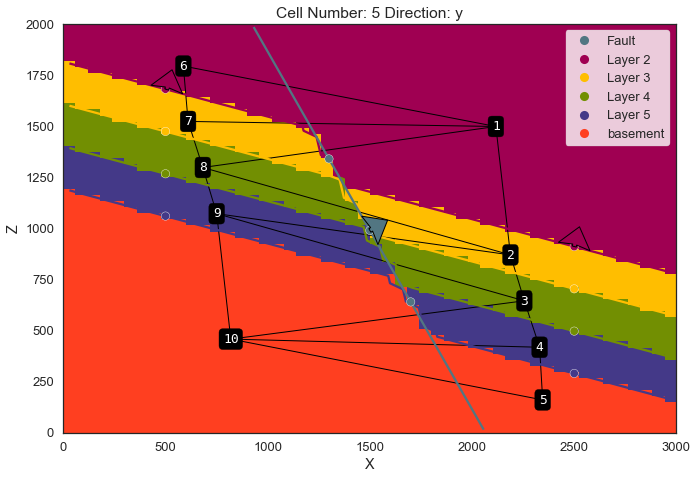

In [24]:
gp.plot_2d(geo_model, cell_number=[5], show=False)
gp.plot.plot_topology(geo_model, edges, centroids, scale=True)
plt.show()

In [25]:
M = tp.get_adjacency_matrix(geo_model, edges, centroids)
print(M)

[[False  True False False False  True  True  True False False]
 [ True False  True False False False False  True  True False]
 [False  True False  True False False False False  True  True]
 [False False  True False  True False False False False  True]
 [False False False  True False False False False False  True]
 [ True False False False False False  True False False False]
 [ True False False False False  True False  True False False]
 [ True  True False False False False  True False  True False]
 [False  True  True False False False False  True False  True]
 [False False  True  True  True False False False  True False]]


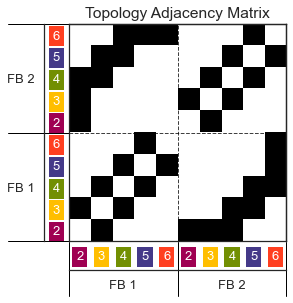

In [26]:
tp.plot_adjacency_matrix(geo_model, M)


surface
Fault       #527682
Layer 2     #9f0052
Layer 3     #ffbe00
Layer 4     #728f02
Layer 5     #443988
basement    #ff3f20
Name: color, dtype: object


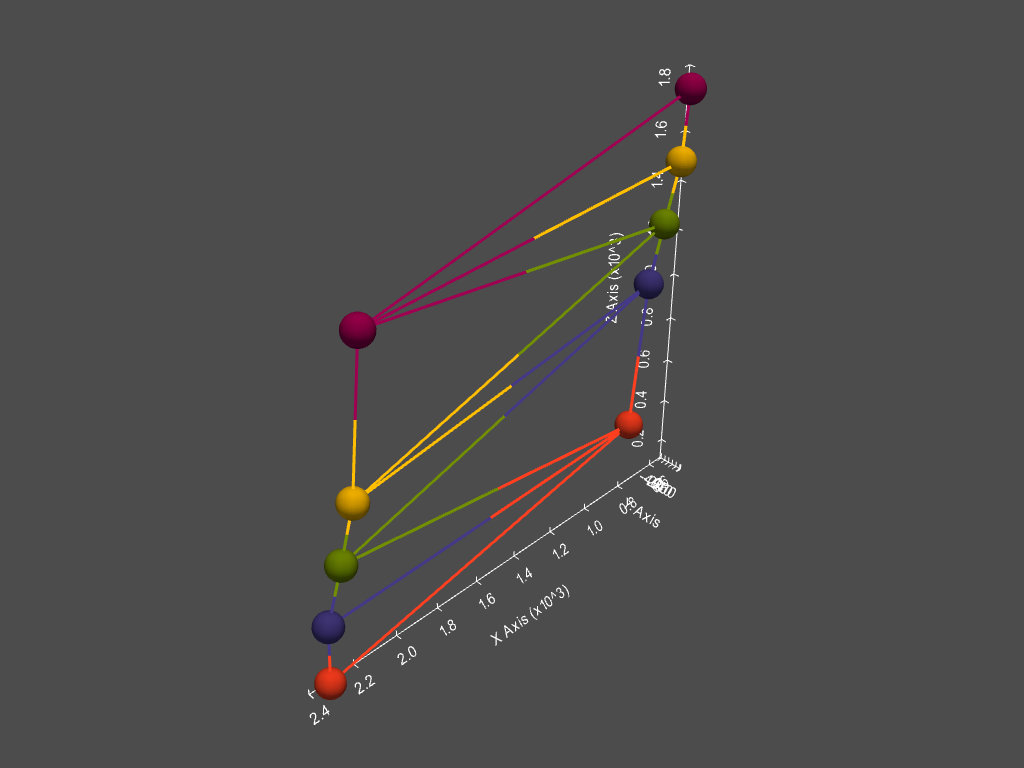

In [27]:
from gempy.plot._vista import Vista
gpv = Vista(geo_model)
gpv.plot_topology(edges, centroids)
gpv.show()

In [28]:
lith_lot = tp.get_lot_node_to_lith_id(geo_model, centroids)
lith_lot

{1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 2, 7: 3, 8: 4, 9: 5, 10: 6}

In [29]:
fault_lot = tp.get_lot_node_to_fault_block(geo_model, centroids)
fault_lot

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1}

In [30]:
tp.get_lot_lith_to_node_id(lith_lot)

{2: [1, 6], 3: [2, 7], 4: [3, 8], 5: [4, 9], 6: [5, 10]}

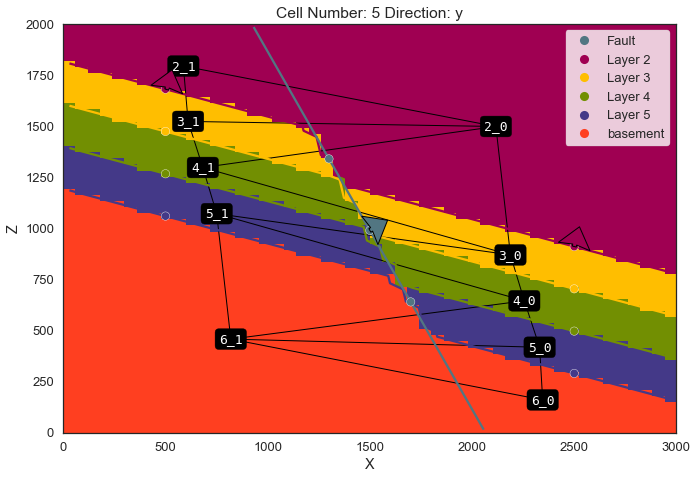

In [31]:
dedges, dcentroids = tp.get_detailed_labels(geo_model, edges, centroids)
gp.plot_2d(geo_model, cell_number=[5], show=False)
gp.plot.plot_topology(geo_model, dedges, dcentroids, scale=True)
plt.show()

In [32]:
M = tp.get_adjacency_matrix(geo_model, edges, centroids)
print(M)

[[False  True False False False  True  True  True False False]
 [ True False  True False False False False  True  True False]
 [False  True False  True False False False False  True  True]
 [False False  True False  True False False False False  True]
 [False False False  True False False False False False  True]
 [ True False False False False False  True False False False]
 [ True False False False False  True False  True False False]
 [ True  True False False False False  True False  True False]
 [False  True  True False False False False  True False  True]
 [False False  True  True  True False False False  True False]]


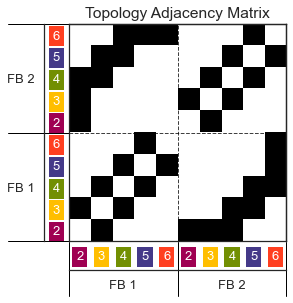

In [33]:
tp.plot_adjacency_matrix(geo_model, M)


surface
Fault       #527682
Layer 2     #9f0052
Layer 3     #ffbe00
Layer 4     #728f02
Layer 5     #443988
basement    #ff3f20
Name: color, dtype: object


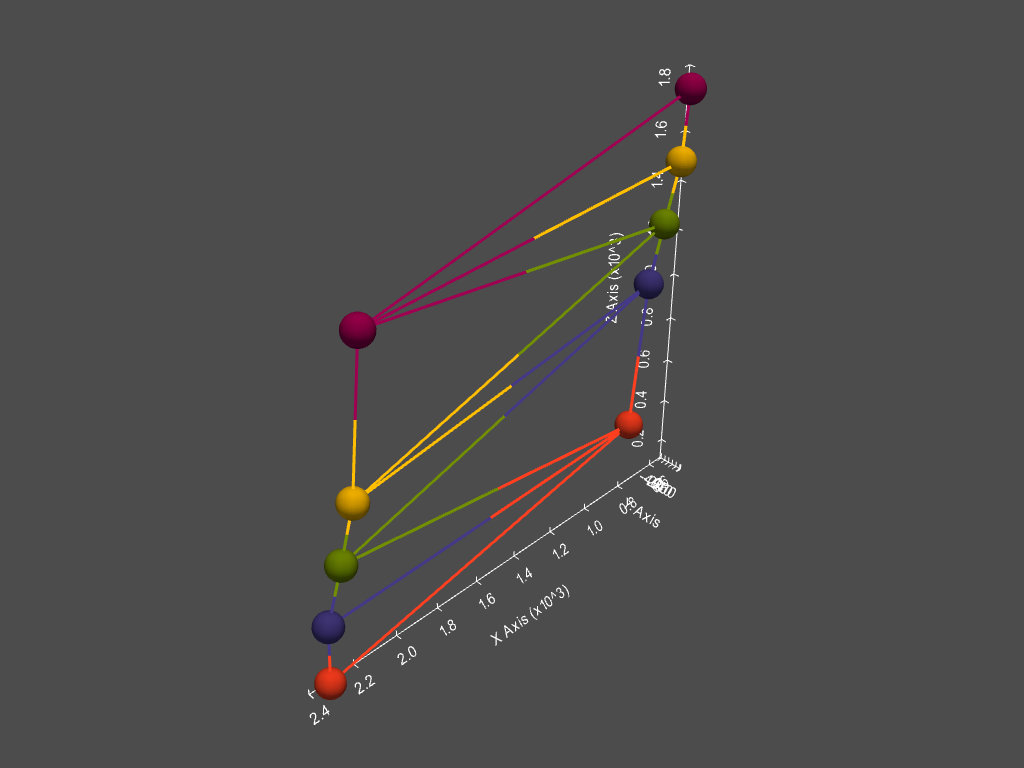

In [34]:
from gempy.plot._vista import Vista
gpv = Vista(geo_model)
gpv.plot_topology(edges, centroids)
gpv.show()

In [35]:
lith_lot = tp.get_lot_node_to_lith_id(geo_model, centroids)
lith_lot

{1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 2, 7: 3, 8: 4, 9: 5, 10: 6}

In [36]:
fault_lot = tp.get_lot_node_to_fault_block(geo_model, centroids)
fault_lot

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1}

In [37]:
tp.get_lot_lith_to_node_id(lith_lot)

{2: [1, 6], 3: [2, 7], 4: [3, 8], 5: [4, 9], 6: [5, 10]}

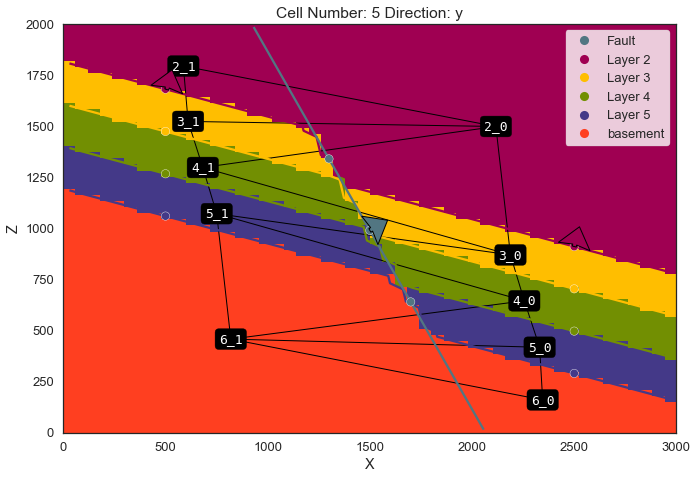

In [38]:
dedges, dcentroids = tp.get_detailed_labels(geo_model, edges, centroids)
gp.plot_2d(geo_model, cell_number=[5], show=False)
gp.plot.plot_topology(geo_model, dedges, dcentroids, scale=True)
plt.show()

In [3]:
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'
path_to_data = data_path + "/data/input_data/jan_models/"

geo_data = gp.create_data('fault', extent=[0, 1000, 0, 1000, 0, 1000], resolution=[50, 50, 50],
                          path_o=path_to_data + "model5_orientations.csv",
                          path_i=path_to_data + "model5_surface_points.csv")

Active grids: ['regular']


In [4]:
gp.map_stack_to_surfaces(geo_data, {"Fault_Series": 'fault',
                                    "Strat_Series": ('rock2', 'rock1')})
geo_data.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Fault,True,True,False
Strat_Series,2,Erosion,True,False,False
Basement,3,Erosion,False,False,False


In [5]:
interp_data = gp.set_interpolator(geo_data, theano_optimizer='fast_compile')

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                        values
range             1732.050808
$C_o$            71428.571429
drift equations     [3, 3, 3]


In [6]:
sol = gp.compute_model(geo_data)

C:\Users\AHMED\anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


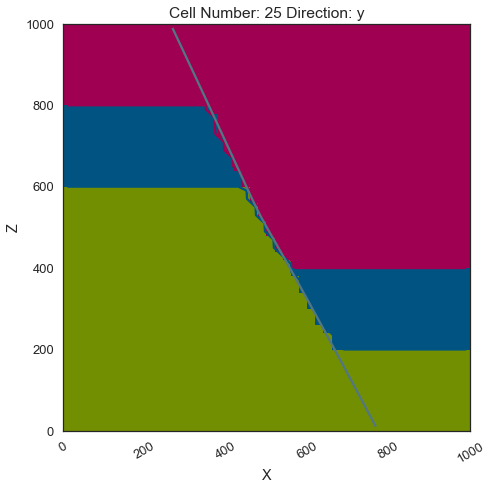

In [7]:
gp.plot_2d(geo_data, cell_number=25,
           direction='y', show_data=False, show_all_data=True)

In [10]:
import gempy as gp
from gempy.assets import topology as tp

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [11]:
edges, centroids = tp.compute_topology(geo_data)

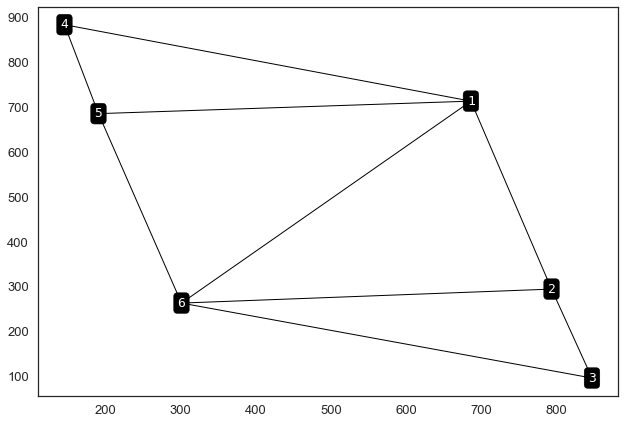

In [13]:
gp.plot.plot_topology(geo_data, edges, centroids)
plt.show()

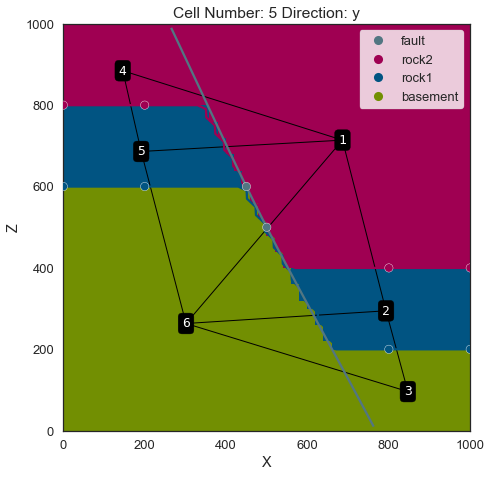

In [15]:
gp.plot_2d(geo_data, cell_number=[5], show=False)
gp.plot.plot_topology(geo_data, edges, centroids, scale=True)
plt.show()

surface
fault       #527682
rock2       #9f0052
rock1       #015482
basement    #728f02
Name: color, dtype: object


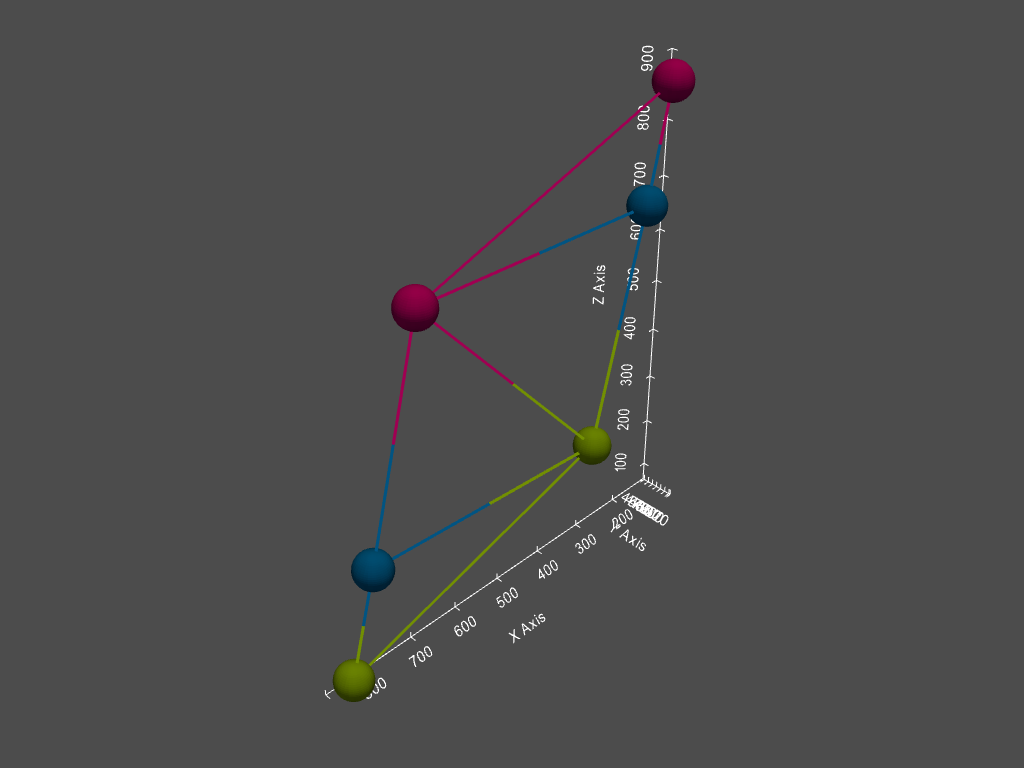

In [17]:
from gempy.plot._vista import Vista
gpv = Vista(geo_data)
gpv.plot_topology(edges, centroids)
gpv.show()

In [19]:
lith_lot = tp.get_lot_node_to_lith_id(geo_data, centroids)
lith_lot

{1: 2, 2: 3, 3: 4, 4: 2, 5: 3, 6: 4}

In [20]:
fault_lot = tp.get_lot_node_to_fault_block(geo_data, centroids)
fault_lot

{1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1}

In [21]:
tp.get_lot_lith_to_node_id(lith_lot)

{2: [1, 4], 3: [2, 5], 4: [3, 6]}

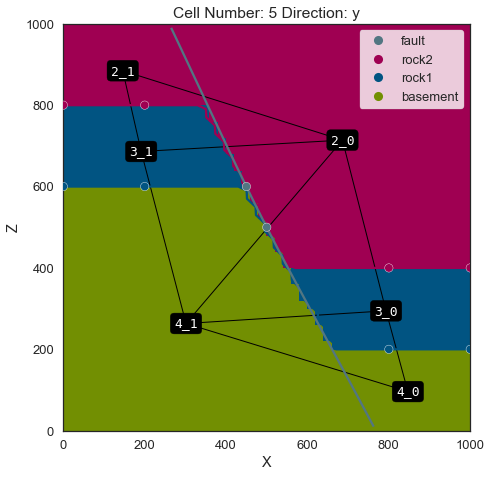

In [22]:
dedges, dcentroids = tp.get_detailed_labels(geo_data, edges, centroids)
gp.plot_2d(geo_data, cell_number=[5], show=False)
gp.plot.plot_topology(geo_data, dedges, dcentroids, scale=True)
plt.show()

In [ ]:
conda install -c conda-forge pygeos